In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import osmnx as ox
import networkx as nx

In [2]:
data=pd.read_excel("Data/Transit Data - October.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704539 entries, 0 to 704538
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       704539 non-null  datetime64[ns]
 1   Time       704539 non-null  datetime64[ns]
 2   Class      704539 non-null  object        
 3   Operation  704539 non-null  object        
 4   Bus        704539 non-null  int64         
 5   Route      704539 non-null  int64         
 6   Latitude   704539 non-null  float64       
 7   Longitude  704539 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 43.0+ MB


In [4]:
print(data.describe())

                 Bus          Route       Latitude      Longitude
count  704539.000000  704539.000000  704539.000000  704539.000000
mean     1241.137280     239.365809      40.941516     -70.604451
std       317.249714     288.489481      13.694826      21.473093
min       315.000000       1.000000       0.000000    -255.426092
25%      1047.000000       3.000000      44.224635     -76.526580
50%      1361.000000      15.000000      44.232833     -76.502100
75%      1480.000000     502.000000      44.248020     -76.486999
max      1689.000000     701.000000     255.426092       0.000000


In [5]:
data.isnull().any()

Date         False
Time         False
Class        False
Operation    False
Bus          False
Route        False
Latitude     False
Longitude    False
dtype: bool

In [6]:
miss_data_latitude=data[data['Latitude']==0]
miss_data_latitude

,Date,Time,Class,Operation,Bus,Route,Latitude,Longitude
49,2017-10-01,1900-01-01 08:10:05,Youth,Pass (Multi-ride card),623,7,0.0,0.0
51,2017-10-01,1900-01-01 08:12:24,Child,Exact Fare,1367,601,0.0,0.0
52,2017-10-01,1900-01-01 08:12:25,ADULT,Pass (Multi-ride card),1367,601,0.0,0.0
54,2017-10-01,1900-01-01 08:26:01,ADULT,Pass (Multi-ride card),729,4,0.0,0.0
55,2017-10-01,1900-01-01 08:26:21,SENIOR,Pass (Multi-ride card),729,4,0.0,0.0
...,...,...,...,...,...,...,...,...
704468,2017-10-01,1900-01-01 16:54:22,ADULT,Pass (Multi-ride card),729,4,0.0,0.0
704470,2017-10-01,1900-01-01 16:54:43,Child,Exact Fare,624,10,0.0,0.0
704476,2017-10-01,1900-01-01 16:56:19,QUEENS,Exact Fare,729,4,0.0,0.0
704477,2017-10-01,1900-01-01 16:56:21,QUEENS,Exact Fare,729,4,0.0,0.0


In [7]:
miss_data_Longitude=data[data['Longitude']==0]
print(miss_data_Longitude == miss_data_latitude)

        Date  Time  Class  Operation   Bus  Route  Latitude  Longitude
49      True  True   True       True  True   True      True       True
51      True  True   True       True  True   True      True       True
52      True  True   True       True  True   True      True       True
54      True  True   True       True  True   True      True       True
55      True  True   True       True  True   True      True       True
...      ...   ...    ...        ...   ...    ...       ...        ...
704468  True  True   True       True  True   True      True       True
704470  True  True   True       True  True   True      True       True
704476  True  True   True       True  True   True      True       True
704477  True  True   True       True  True   True      True       True
704488  True  True   True       True  True   True      True       True

[55753 rows x 8 columns]


/var/folders/k3/dm3pbfdd7ysgk9czg_x952pc0000gn/T/ipykernel_25487/192970983.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax2 = Axes3D(fig)


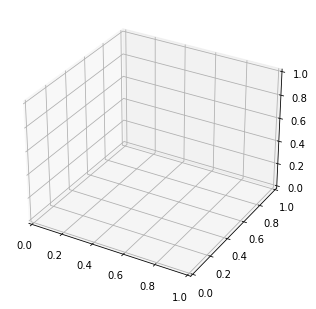

In [8]:
fig=plt.figure()
ax2 = Axes3D(fig)

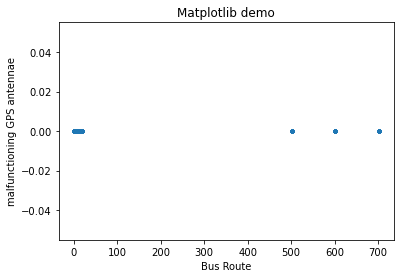

In [9]:
plt.title("Matplotlib demo") 
plt.xlabel("Bus Route") 
plt.ylabel("malfunctioning GPS antennae") 
plt.plot(miss_data_Longitude['Route'],miss_data_Longitude['Longitude'],'.') 
plt.show()

In [10]:
miss_data_Longitude['Route'].unique()

array([  7, 601,   4,  10,  18, 701,  12,   3,  20,  15,  14,   2,  11,
         1, 502,  16, 501,   6,   8,  13])

In [11]:
data['Route'].unique()

array([ 17,   7, 701,  15, 501, 502,   1, 601,   4,   3,  11,   2,  12,
        16,  10,  18,  13,   6,  14,  20,   8])

In [12]:
for i in data['Route'].unique():
    if i not in miss_data_Longitude['Route'].unique():
        print(i)

17


In [13]:
data.dropna()
# data['Longitude'].dropna()
# data['Latitude'].dropna()

,Date,Time,Class,Operation,Bus,Route,Latitude,Longitude
0,2017-10-01,1900-01-01 01:43:03,QUEENS,Exact Fare,620,17,44.227860,-76.496938
1,2017-10-01,1900-01-01 01:43:08,QUEENS,Exact Fare,620,17,44.227860,-76.496938
2,2017-10-01,1900-01-01 01:58:13,ADULT,Pass (Multi-ride card),620,17,44.232035,-76.491397
3,2017-10-01,1900-01-01 01:58:25,QUEENS,Exact Fare,620,17,44.232035,-76.491397
4,2017-10-01,1900-01-01 01:58:27,QUEENS,Exact Fare,620,17,44.232035,-76.491397
...,...,...,...,...,...,...,...,...
704534,2017-10-01,1900-01-01 17:07:13,QUEENS,Exact Fare,1362,701,44.255135,-76.572517
704535,2017-10-01,1900-01-01 17:07:22,QUEENS,Exact Fare,1362,701,44.255135,-76.572517
704536,2017-10-01,1900-01-01 17:07:31,ST LAWRENCE,Exact Fare,1362,701,44.255135,-76.572517
704537,2017-10-01,1900-01-01 17:08:47,QUEENS,Exact Fare,1257,18,44.231425,-76.484333


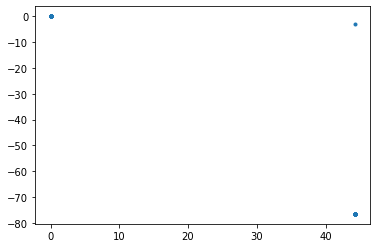

In [14]:
bus_7 = data.loc[data['Route']==7]
bus_7
plt.plot(bus_7['Latitude'],bus_7['Longitude'],".")
plt.show()

In [16]:
ox.config(log_console=True, use_cache=True)
place = 'Kingston, Ontario, Canada'
mode = 'drive'
graph = ox.graph_from_place(place, network_type = mode)
graph

/Users/Elaine/miniforge3/lib/python3.9/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(
